In [175]:
import json
import os, sys
import csv
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics 
import numpy as np

# Write Dictionary with metaData
metaDataHeader = {}

metaDataHeader[0] = 'Data'
metaDataHeader[1] = 'Graph'
metaDataHeader[2] = 'full'
metaDataHeader[3] = 'multi'
metaDataHeader[4] = 'paired1'
metaDataHeader[5] = 'paired2'
metaDataHeader[6] = 'Number of maximum recursion depth'
metaDataHeader[7] = 'Number of maximum Transcripts/Gene'
metaDataHeader[8] = 'opt'
metaDataHeader[9] = 'Norm'
metaDataHeader[10] = 'Sparsity Constraint'
metaDataHeader[11] = 'Lambda'
metaDataHeader[12] = 'Mu'
metaDataHeader[13] = 'flowOptimization'
metaDataHeader[14] = 'CostFunctionIndex'
metaDataHeader[15] = 'maxAdditionalEdgeCount'
metaDataHeader[16] = 'Mode of Backtrack'
metaDataHeader[17] = 'Name of gtfFile'
metaDataHeader[18] = 'Name of csv-Resultfile'
metaDataHeader[19] = 'Name of jsonFile'
metaDataHeader[20] = 'Time'
metaDataHeader[21] = 'Number of Transcripts without Optimization'
metaDataHeader[22] = 'Number of Transcripts with Optimization'
metaDataHeader[23] = 'Number of genes with 0 Transcripts with Optimization'

metaDataHeader[24] = 'Average number of transcripts/gene without Optimization'
metaDataHeader[25] = 'Standard deviation of transcripts/gene without Optimization'
metaDataHeader[26] = 'Average number of transcripts/gene with Optimization'
metaDataHeader[27] = 'Standard deviation of transcripts/gene with Optimization'

metaDataHeader[28] = 'Average transcript size without Optimization'
metaDataHeader[29] = 'Standard deviation of transcriptSize without Optimization'
metaDataHeader[30] = 'Average transcript size with Optimization'
metaDataHeader[31] = 'Standard deviation of transcriptSize with Optimization'

metaDataHeader[32] = 'Average number of exons/Gene'
metaDataHeader[33] = 'Standard deviation of exons/Gene'

metaDataHeader[34] = 'Number of single Exon transcripts without Optimization'
metaDataHeader[35] = 'Number of single Exon transcripts with Optimization'

metaDataHeader[36] = 'Number of total Genes'
metaDataHeader[37] = 'Number of Genes exceeding maxTranscripts'
metaDataHeader[38] = 'Number of Genes exceeding maxRecursion'
metaDataHeader[39] = 'Number of Genes exceeding maxPairedBins'

metaDataHeader[40] = 'True positives'
metaDataHeader[41] = 'False positives'
metaDataHeader[42] = 'Total positives'
metaDataHeader[43] = 'False negatives'
metaDataHeader[44] = 'Total Transcripts of ReferenceGTF'
metaDataHeader[45] = 'Sensitivity on IntronChainLevel'
metaDataHeader[46] = 'Precision on IntronChainLevel'
metaDataHeader[47] = 'Fuzzy Sensitivity on IntronChainLevel'
metaDataHeader[48] = 'Fuzzy Precision on IntronChainLevel'

#Read DataFrame
WP1Filename = ('../Results/resultsWP1.csv')
WP2Filename = ('../Results/resultsWP2.csv')
WP3Filename = ('../Results/resultsWP3.csv')

WP1_df = pd.read_csv(WP1Filename, names=list(metaDataHeader.values()), header=None, delimiter='\t')
WP2_df = pd.read_csv(WP2Filename, names=list(metaDataHeader.values()), index_col=False, header = None, skiprows=1)
WP3_df = pd.read_csv(WP3Filename, names=list(metaDataHeader.values()), header=None, delimiter='\t')

WP1_df['Time'] = WP1_df['Time'].str.split('s', expand=True)[0].astype(float)
WP3_df['Time'] = WP3_df['Time'].str.split('s', expand=True)[0].astype(float)

WP1_df['Time/Gene'] = WP1_df['Time']/WP1_df['Number of total Genes']*1000
WP2_df['Time/Gene'] = WP2_df['Time']/WP2_df['Number of total Genes']*1000
WP3_df['Time/Gene'] = WP3_df['Time']/WP3_df['Number of total Genes']*1000

WP1_df['Fraction exceeding Transcripts'] = WP1_df['Number of Genes exceeding maxTranscripts']/WP1_df['Number of total Genes']*100
WP2_df['Fraction exceeding Transcripts'] = WP2_df['Number of Genes exceeding maxTranscripts']/WP2_df['Number of total Genes']*100
WP3_df['Fraction exceeding Transcripts'] = WP3_df['Number of Genes exceeding maxTranscripts']/WP3_df['Number of total Genes']*100

#Split dataFrame WP1
WP1_df_full = WP1_df[WP1_df['full'] ==1]
WP1_df_paired2 = WP1_df[WP1_df['paired2'] ==1]
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR545723.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'ERR188021.graph'].index)

WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR545723.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'ERR188021.graph'].index)

# Split WP2
WP2_df_L1 = WP2_df[WP2_df['Norm']==1]
WP2_df_L1_LO= WP2_df_L1[WP2_df_L1['Sparsity Constraint']==0]
WP2_df_L1_LO_10 = WP2_df_L1_LO[WP2_df_L1_LO['Lambda'] == '10']


/var/folders/1c/m3fts4qs7_n2scc_qgzqy7sw0000gn/T/ipykernel_90917/4136708908.py:77: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  WP2_df = pd.read_csv(WP2Filename, names=list(metaDataHeader.values()), index_col=False, header = None, skiprows=1)


In [176]:
# Split dataFrame WP3 by Mode of Backtrack
WP3_df_TLLP = WP3_df[WP3_df['Mode of Backtrack'] == 'TLLP']
WP3_df_TLMF = WP3_df[WP3_df['Mode of Backtrack'] == 'TLMF']
WP3_df_DPLP = WP3_df[WP3_df['Mode of Backtrack'] == 'DPLP']
WP3_df_DPMF = WP3_df[WP3_df['Mode of Backtrack'] == 'DPMF']

# Split dataFrames by CostFunctionIndex
WP3_df_0 = WP3_df[WP3_df['CostFunctionIndex'] == 0]
WP3_df_1 = WP3_df[WP3_df['CostFunctionIndex'] == 1]
WP3_df_2 = WP3_df[WP3_df['CostFunctionIndex'] == 2]
WP3_df_3 = WP3_df[WP3_df['CostFunctionIndex'] == 3]
WP3_df_4 = WP3_df[WP3_df['CostFunctionIndex'] == 4]
WP3_df_5 = WP3_df[WP3_df['CostFunctionIndex'] == 5]

# Split dataFranes by CostFunction
WP3_df_TLLP_0 = WP3_df_TLLP[WP3_df_TLLP['CostFunctionIndex'] == 0]
WP3_df_TLLP_1 = WP3_df_TLLP[WP3_df_TLLP['CostFunctionIndex'] == 1]
WP3_df_TLLP_2 = WP3_df_TLLP[WP3_df_TLLP['CostFunctionIndex'] == 2]
WP3_df_TLLP_3 = WP3_df_TLLP[WP3_df_TLLP['CostFunctionIndex'] == 3]
WP3_df_TLLP_4 = WP3_df_TLLP[WP3_df_TLLP['CostFunctionIndex'] == 4]
WP3_df_TLLP_5 = WP3_df_TLLP[WP3_df_TLLP['CostFunctionIndex'] == 5]

WP3_df_TLMF_0 = WP3_df_TLMF[WP3_df_TLMF['CostFunctionIndex'] == 0]
WP3_df_TLMF_1 = WP3_df_TLMF[WP3_df_TLMF['CostFunctionIndex'] == 1]
WP3_df_TLMF_2 = WP3_df_TLMF[WP3_df_TLMF['CostFunctionIndex'] == 2]
WP3_df_TLMF_3 = WP3_df_TLMF[WP3_df_TLMF['CostFunctionIndex'] == 3]
WP3_df_TLMF_4 = WP3_df_TLMF[WP3_df_TLMF['CostFunctionIndex'] == 4]
WP3_df_TLMF_5 = WP3_df_TLMF[WP3_df_TLMF['CostFunctionIndex'] == 5]

WP3_df_DPLP_0 = WP3_df_DPLP[WP3_df_DPLP['CostFunctionIndex'] == 0]
WP3_df_DPLP_1 = WP3_df_DPLP[WP3_df_DPLP['CostFunctionIndex'] == 1]
WP3_df_DPLP_2 = WP3_df_DPLP[WP3_df_DPLP['CostFunctionIndex'] == 2]
WP3_df_DPLP_3 = WP3_df_DPLP[WP3_df_DPLP['CostFunctionIndex'] == 3]
WP3_df_DPLP_4 = WP3_df_DPLP[WP3_df_DPLP['CostFunctionIndex'] == 4]
WP3_df_DPLP_5 = WP3_df_DPLP[WP3_df_DPLP['CostFunctionIndex'] == 5]

WP3_df_DPMF_0 = WP3_df_DPMF[WP3_df_DPMF['CostFunctionIndex'] == 0]
WP3_df_DPMF_1 = WP3_df_DPMF[WP3_df_DPMF['CostFunctionIndex'] == 1]
WP3_df_DPMF_2 = WP3_df_DPMF[WP3_df_DPMF['CostFunctionIndex'] == 2]
WP3_df_DPMF_3 = WP3_df_DPMF[WP3_df_DPMF['CostFunctionIndex'] == 3]
WP3_df_DPMF_4 = WP3_df_DPMF[WP3_df_DPMF['CostFunctionIndex'] == 4]
WP3_df_DPMF_5 = WP3_df_DPMF[WP3_df_DPMF['CostFunctionIndex'] == 5]

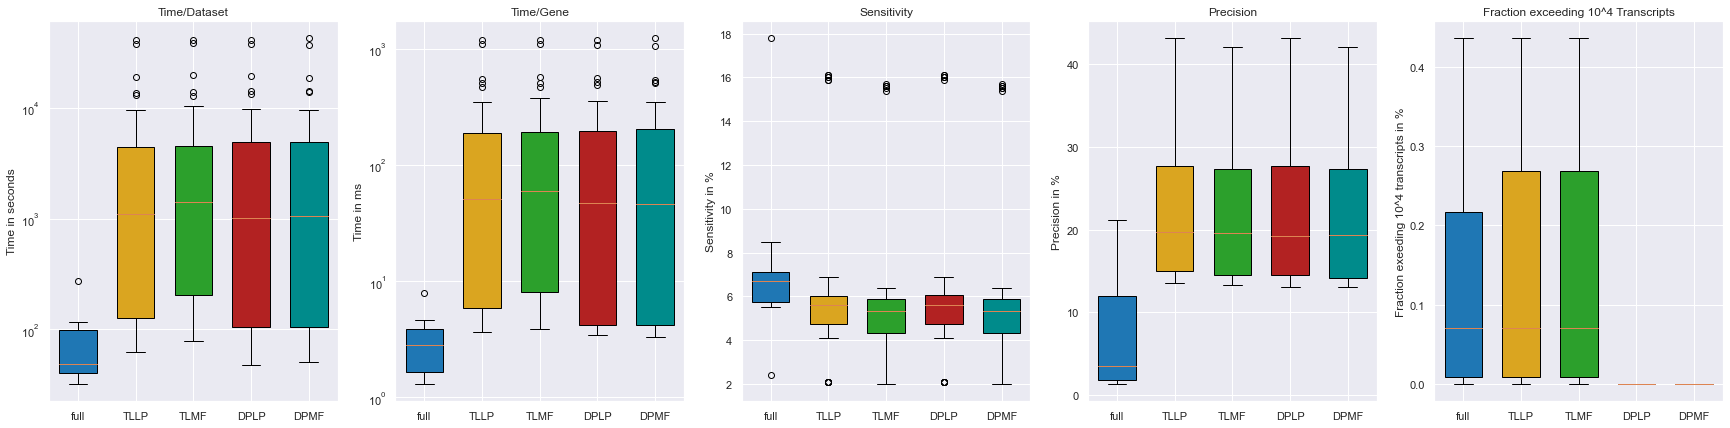

In [177]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan']

# Plot Time
boxplot1=ax1.boxplot(x=[WP1_df_full['Time'], WP3_df_TLLP['Time'], WP3_df_TLMF['Time'], WP3_df_DPLP['Time'], WP3_df_DPMF['Time']], widths=0.65, patch_artist=True, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'])
ax1.set_title('Time/Dataset')
ax1.set_ylabel('Time in seconds')
ax1.set_yscale('log')
 
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP1_df_full['Time/Gene'], WP3_df_TLLP['Time/Gene'], WP3_df_TLMF['Time/Gene'], WP3_df_DPLP['Time/Gene'], WP3_df_DPMF['Time/Gene']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in ms')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP1_df_full['Sensitivity on IntronChainLevel'], WP3_df_TLLP['Sensitivity on IntronChainLevel'], WP3_df_TLMF['Sensitivity on IntronChainLevel'], WP3_df_DPLP['Sensitivity on IntronChainLevel'], WP3_df_DPMF['Sensitivity on IntronChainLevel']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP1_df_full['Precision on IntronChainLevel'],WP3_df_TLLP['Precision on IntronChainLevel'], WP3_df_TLMF['Precision on IntronChainLevel'], WP3_df_DPLP['Precision on IntronChainLevel'], WP3_df_DPMF['Precision on IntronChainLevel']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)

# Plot Fraction exceeding Max Transcripts
boxplot5=ax5.boxplot(x=[WP1_df_full['Fraction exceeding Transcripts'], WP3_df_TLLP['Fraction exceeding Transcripts'], WP3_df_TLMF['Fraction exceeding Transcripts'], WP3_df_DPLP['Fraction exceeding Transcripts'], WP3_df_DPMF['Fraction exceeding Transcripts']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax5.set_title('Fraction exceeding 10^4 Transcripts')
ax5.set_ylabel('Fraction exeeding 10^4 transcripts in %')
for patch, color in zip(boxplot5['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('../Results/WP3/Mode_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()


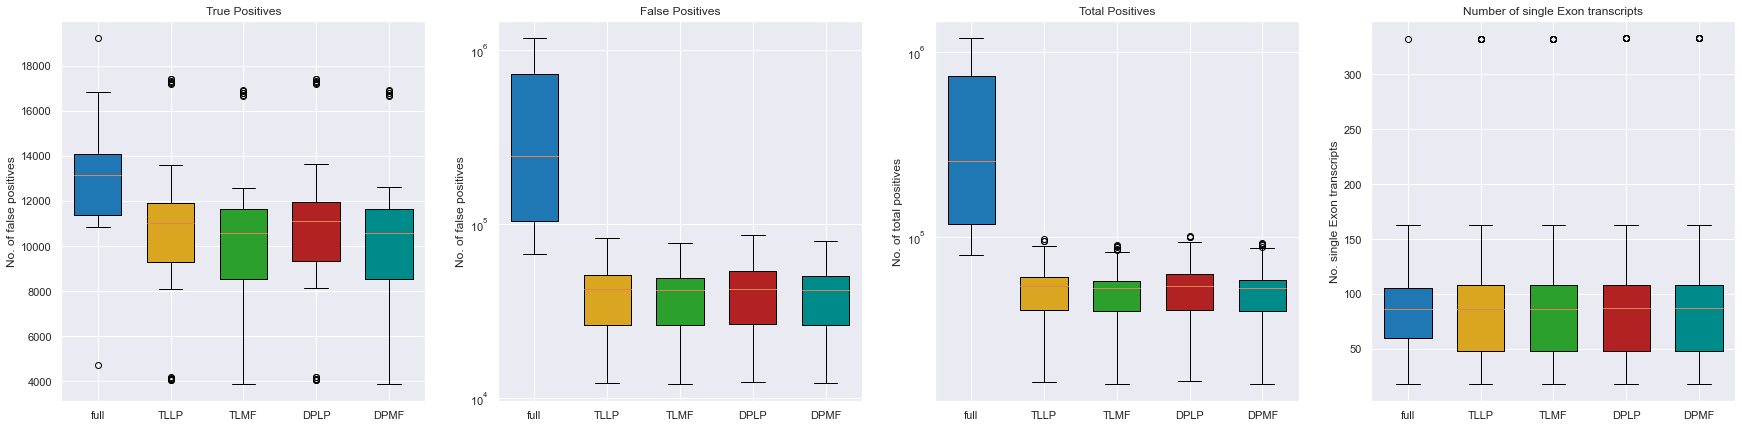

In [178]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan']

# Plot Time
boxplot1=ax1.boxplot(x=[WP1_df_full['True positives'], WP3_df_TLLP['True positives'], WP3_df_TLMF['True positives'], WP3_df_DPLP['True positives'], WP3_df_DPMF['True positives']], widths=0.65, patch_artist=True, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'])
ax1.set_title('True Positives')
ax1.set_ylabel('No. of false positives')
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP1_df_full['False positives'], WP3_df_TLLP['False positives'], WP3_df_TLMF['False positives'], WP3_df_DPLP['False positives'], WP3_df_DPMF['False positives']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax2.set_title('False Positives')
ax2.set_ylabel('No. of false positives')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP1_df_full['Total positives'], WP3_df_TLLP['Total positives'], WP3_df_TLMF['Total positives'], WP3_df_DPLP['Total positives'], WP3_df_DPMF['Total positives']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax3.set_title('Total Positives')
ax3.set_ylabel('No. of total positives')
ax3.set_yscale('log')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP1_df_full['Number of single Exon transcripts without Optimization'],WP3_df_TLLP['Number of single Exon transcripts with Optimization'], WP3_df_TLMF['Number of single Exon transcripts with Optimization'], WP3_df_DPLP['Number of single Exon transcripts with Optimization'], WP3_df_DPMF['Number of single Exon transcripts with Optimization']], widths=0.65, labels=['full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'], patch_artist=True)
ax4.set_title('Number of single Exon transcripts')
ax4.set_ylabel('No. single Exon transcripts')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('../Results/WP3/Mode_Positives_SingleExons.png')
plt.show()

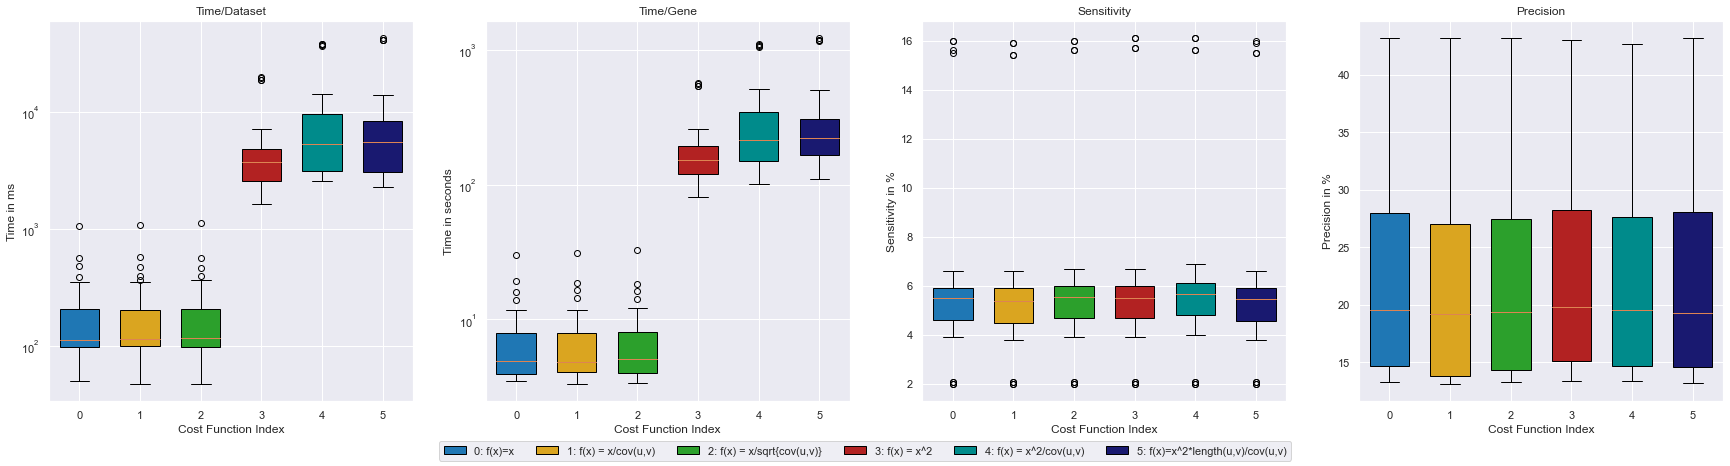

In [179]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']
cost_functions = ('0: f(x)=x', '1: f(x) = x/cov(u,v)', '2: f(x) = x/sqrt{cov(u,v)}', '3: f(x) = x^2', '4: f(x) = x^2/cov(u,v)', '5: f(x)=x^2*length(u,v)/cov(u,v)')
# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_0['Time'], WP3_df_1['Time'], WP3_df_2['Time'], WP3_df_3['Time'], WP3_df_4['Time'], WP3_df_5['Time']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('Time/Dataset')
ax1.set_xlabel('Cost Function Index')
ax1.set_ylabel('Time in ms')
ax1.set_yscale('log')
boxes = []
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)
    boxes.append(patch)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_0['Time/Gene'], WP3_df_1['Time/Gene'], WP3_df_2['Time/Gene'], WP3_df_3['Time/Gene'], WP3_df_4['Time/Gene'], WP3_df_5['Time/Gene']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in seconds')
ax2.set_xlabel('Cost Function Index')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_0['Sensitivity on IntronChainLevel'], WP3_df_1['Sensitivity on IntronChainLevel'], WP3_df_2['Sensitivity on IntronChainLevel'], WP3_df_3['Sensitivity on IntronChainLevel'], WP3_df_4['Sensitivity on IntronChainLevel'], WP3_df_5['Sensitivity on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_0['Precision on IntronChainLevel'],WP3_df_1['Precision on IntronChainLevel'], WP3_df_2['Precision on IntronChainLevel'], WP3_df_3['Precision on IntronChainLevel'], WP3_df_4['Precision on IntronChainLevel'], WP3_df_5['Precision on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/CostFunction_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()

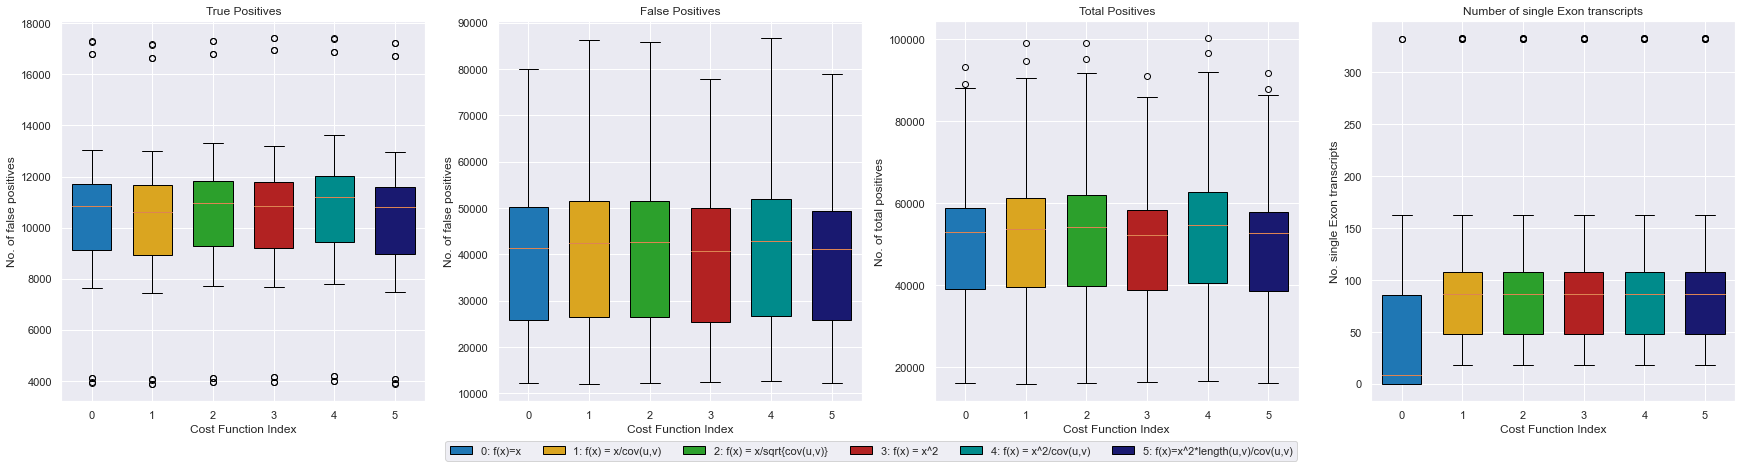

In [180]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']
boxes = []
# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_0['True positives'], WP3_df_1['True positives'], WP3_df_2['True positives'], WP3_df_3['True positives'], WP3_df_4['True positives'], WP3_df_5['True positives']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('True Positives')
ax1.set_ylabel('No. of false positives')
ax1.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)
    boxes.append(patch)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_0['False positives'], WP3_df_1['False positives'], WP3_df_2['False positives'], WP3_df_3['False positives'], WP3_df_4['False positives'], WP3_df_5['False positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('False Positives')
ax2.set_ylabel('No. of false positives')
ax2.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_0['Total positives'], WP3_df_1['Total positives'], WP3_df_2['Total positives'], WP3_df_3['Total positives'], WP3_df_4['Total positives'], WP3_df_5['Total positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Total Positives')
ax3.set_ylabel('No. of total positives')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_0['Number of single Exon transcripts without Optimization'], WP3_df_1['Number of single Exon transcripts with Optimization'], WP3_df_2['Number of single Exon transcripts with Optimization'], WP3_df_3['Number of single Exon transcripts with Optimization'], WP3_df_4['Number of single Exon transcripts with Optimization'], WP3_df_5['Number of single Exon transcripts with Optimization']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Number of single Exon transcripts')
ax4.set_ylabel('No. single Exon transcripts')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)

plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/CostFunction_Positives_SingleExons.png')
plt.show()

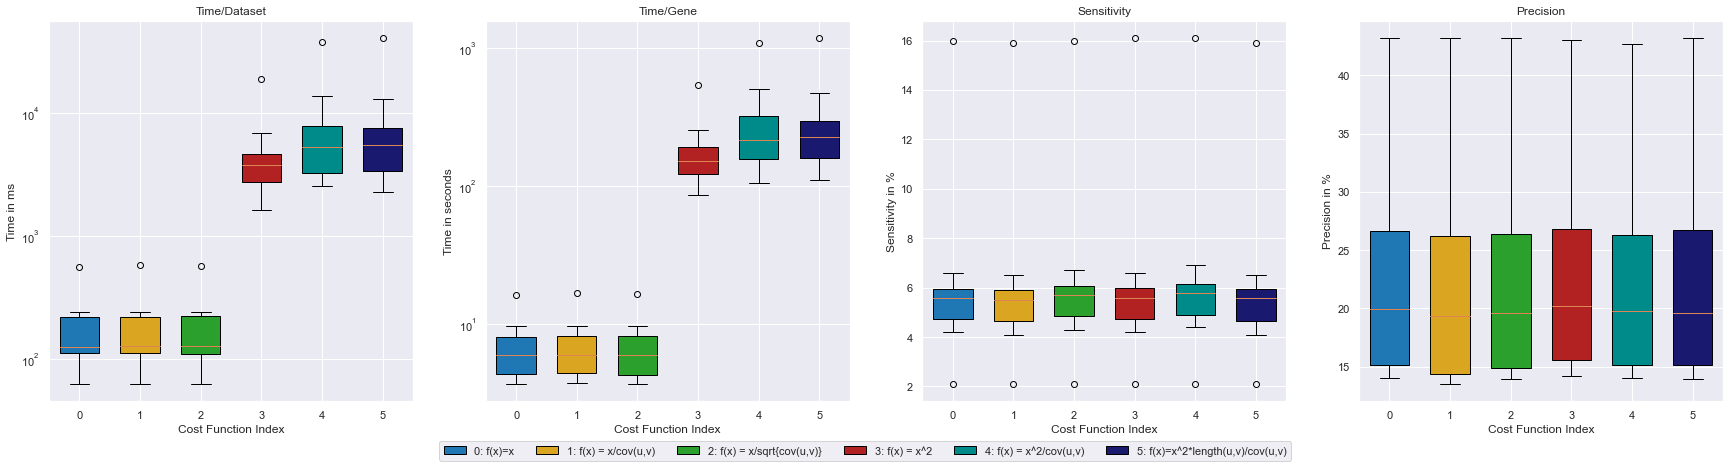

In [181]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']
cost_functions = ('0: f(x)=x', '1: f(x) = x/cov(u,v)', '2: f(x) = x/sqrt{cov(u,v)}', '3: f(x) = x^2', '4: f(x) = x^2/cov(u,v)', '5: f(x)=x^2*length(u,v)/cov(u,v)')
# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_TLLP_0['Time'], WP3_df_TLLP_1['Time'], WP3_df_TLLP_2['Time'], WP3_df_TLLP_3['Time'], WP3_df_TLLP_4['Time'], WP3_df_TLLP_5['Time']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('Time/Dataset')
ax1.set_xlabel('Cost Function Index')
ax1.set_ylabel('Time in ms')
ax1.set_yscale('log')
boxes = []
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)
    boxes.append(patch)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_TLLP_0['Time/Gene'], WP3_df_TLLP_1['Time/Gene'], WP3_df_TLLP_2['Time/Gene'], WP3_df_TLLP_3['Time/Gene'], WP3_df_TLLP_4['Time/Gene'], WP3_df_TLLP_5['Time/Gene']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in seconds')
ax2.set_yscale('log')
ax2.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_TLLP_0['Sensitivity on IntronChainLevel'], WP3_df_TLLP_1['Sensitivity on IntronChainLevel'], WP3_df_TLLP_2['Sensitivity on IntronChainLevel'], WP3_df_TLLP_3['Sensitivity on IntronChainLevel'], WP3_df_TLLP_4['Sensitivity on IntronChainLevel'], WP3_df_TLLP_5['Sensitivity on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_TLLP_0['Precision on IntronChainLevel'],WP3_df_TLLP_1['Precision on IntronChainLevel'], WP3_df_TLLP_2['Precision on IntronChainLevel'], WP3_df_TLLP_3['Precision on IntronChainLevel'], WP3_df_TLLP_4['Precision on IntronChainLevel'], WP3_df_TLLP_5['Precision on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/TLLP_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()

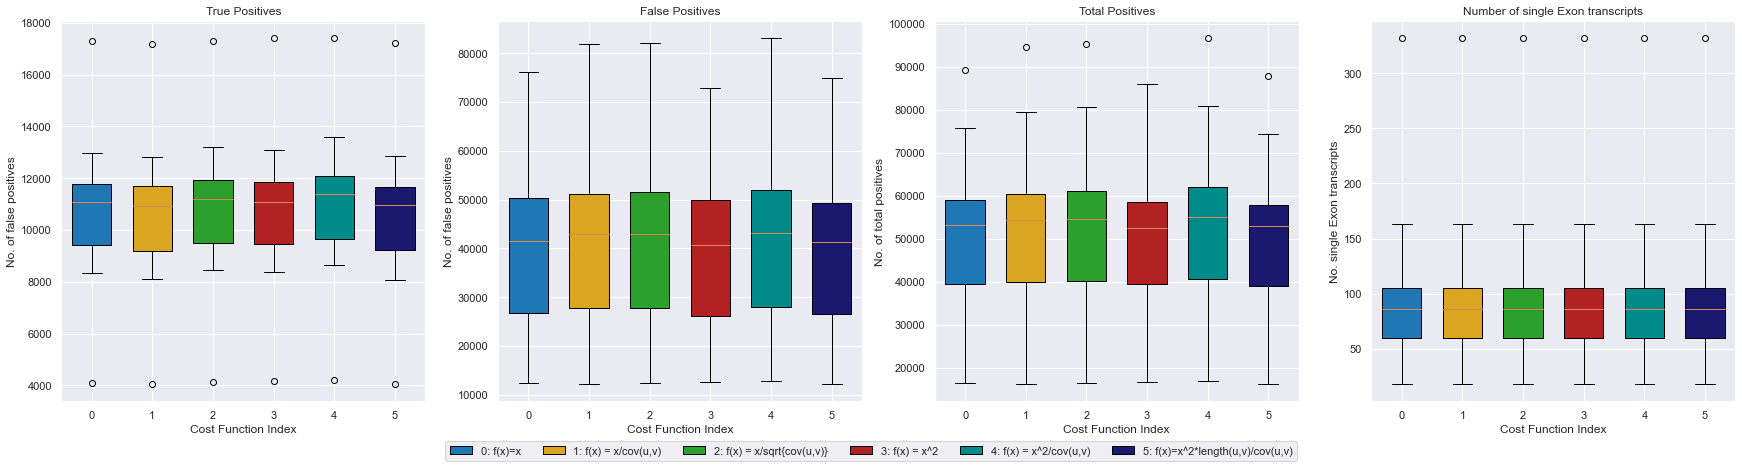

In [182]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']

# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_TLLP_0['True positives'], WP3_df_TLLP_1['True positives'], WP3_df_TLLP_2['True positives'], WP3_df_TLLP_3['True positives'], WP3_df_TLLP_4['True positives'], WP3_df_TLLP_5['True positives']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('True Positives')
ax1.set_ylabel('No. of false positives')
ax1.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_TLLP_0['False positives'], WP3_df_TLLP_1['False positives'], WP3_df_TLLP_2['False positives'], WP3_df_TLLP_3['False positives'], WP3_df_TLLP_4['False positives'], WP3_df_TLLP_5['False positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('False Positives')
ax2.set_ylabel('No. of false positives')
ax2.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_TLLP_0['Total positives'], WP3_df_TLLP_1['Total positives'], WP3_df_TLLP_2['Total positives'], WP3_df_TLLP_3['Total positives'], WP3_df_TLLP_4['Total positives'], WP3_df_TLLP_5['Total positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Total Positives')
ax3.set_ylabel('No. of total positives')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_TLLP_0['Number of single Exon transcripts without Optimization'], WP3_df_TLLP_1['Number of single Exon transcripts with Optimization'], WP3_df_TLLP_2['Number of single Exon transcripts with Optimization'], WP3_df_TLLP_3['Number of single Exon transcripts with Optimization'], WP3_df_TLLP_4['Number of single Exon transcripts with Optimization'], WP3_df_TLLP_5['Number of single Exon transcripts with Optimization']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Number of single Exon transcripts')
ax4.set_ylabel('No. single Exon transcripts')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/TLLP_CostFunctions_Positives_SingleExons.png')
plt.show()

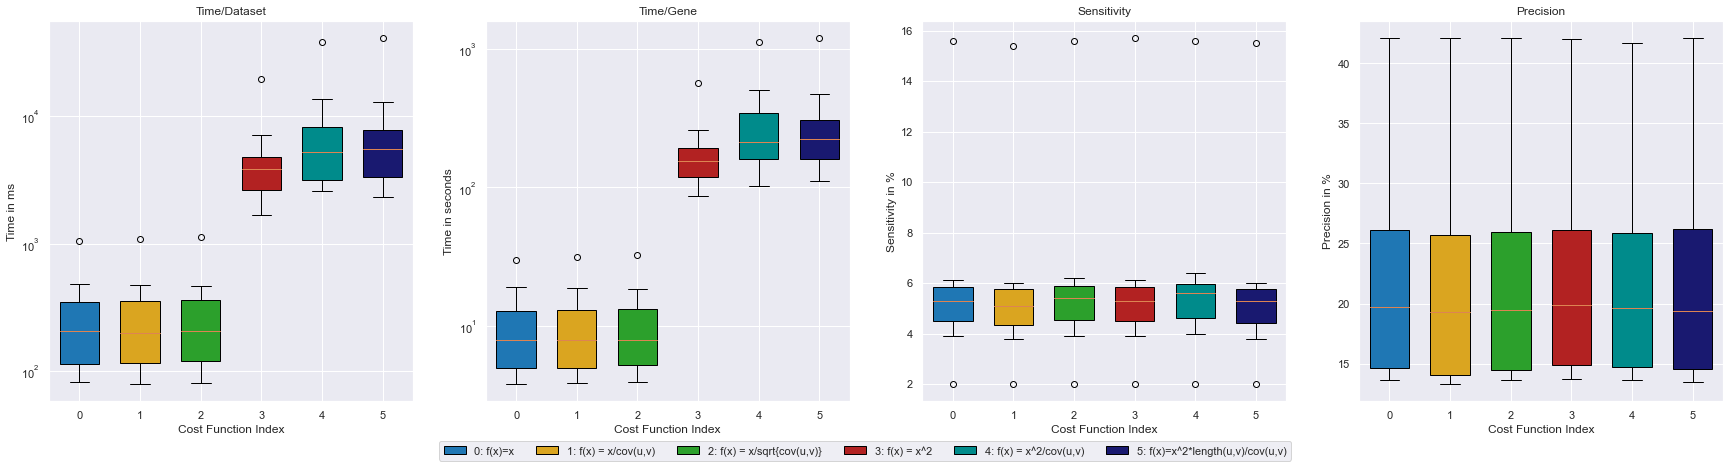

In [183]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']
cost_functions = ('0: f(x)=x', '1: f(x) = x/cov(u,v)', '2: f(x) = x/sqrt{cov(u,v)}', '3: f(x) = x^2', '4: f(x) = x^2/cov(u,v)', '5: f(x)=x^2*length(u,v)/cov(u,v)')
# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_TLMF_0['Time'], WP3_df_TLMF_1['Time'], WP3_df_TLMF_2['Time'], WP3_df_TLMF_3['Time'], WP3_df_TLMF_4['Time'], WP3_df_TLMF_5['Time']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('Time/Dataset')
ax1.set_xlabel('Cost Function Index')
ax1.set_ylabel('Time in ms')
ax1.set_yscale('log')
boxes = []
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)
    boxes.append(patch)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_TLMF_0['Time/Gene'], WP3_df_TLMF_1['Time/Gene'], WP3_df_TLMF_2['Time/Gene'], WP3_df_TLMF_3['Time/Gene'], WP3_df_TLMF_4['Time/Gene'], WP3_df_TLMF_5['Time/Gene']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in seconds')
ax2.set_xlabel('Cost Function Index')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_TLMF_0['Sensitivity on IntronChainLevel'], WP3_df_TLMF_1['Sensitivity on IntronChainLevel'], WP3_df_TLMF_2['Sensitivity on IntronChainLevel'], WP3_df_TLMF_3['Sensitivity on IntronChainLevel'], WP3_df_TLMF_4['Sensitivity on IntronChainLevel'], WP3_df_TLMF_5['Sensitivity on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_TLMF_0['Precision on IntronChainLevel'],WP3_df_TLMF_1['Precision on IntronChainLevel'], WP3_df_TLMF_2['Precision on IntronChainLevel'], WP3_df_TLMF_3['Precision on IntronChainLevel'], WP3_df_TLMF_4['Precision on IntronChainLevel'], WP3_df_TLMF_5['Precision on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/TLMF_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()

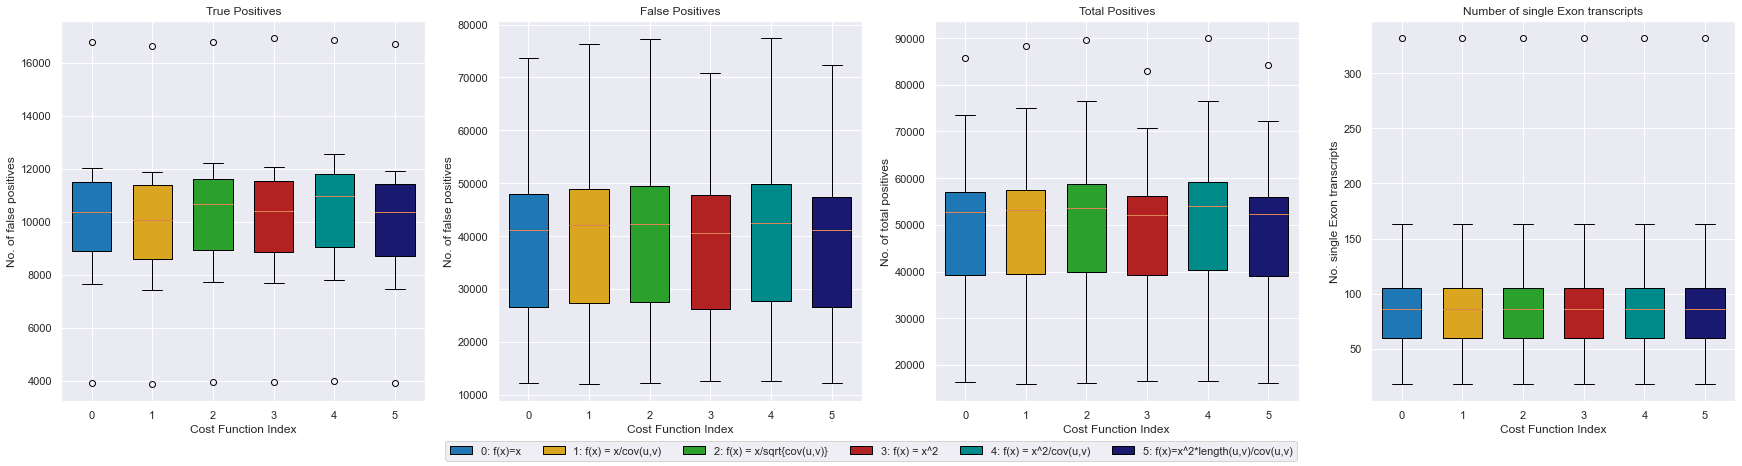

In [184]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']

# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_TLMF_0['True positives'], WP3_df_TLMF_1['True positives'], WP3_df_TLMF_2['True positives'], WP3_df_TLMF_3['True positives'], WP3_df_TLMF_4['True positives'], WP3_df_TLMF_5['True positives']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('True Positives')
ax1.set_ylabel('No. of false positives')
ax1.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_TLMF_0['False positives'], WP3_df_TLMF_1['False positives'], WP3_df_TLMF_2['False positives'], WP3_df_TLMF_3['False positives'], WP3_df_TLMF_4['False positives'], WP3_df_TLMF_5['False positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('False Positives')
ax2.set_ylabel('No. of false positives')
ax2.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_TLMF_0['Total positives'], WP3_df_TLMF_1['Total positives'], WP3_df_TLMF_2['Total positives'], WP3_df_TLMF_3['Total positives'], WP3_df_TLMF_4['Total positives'], WP3_df_TLMF_5['Total positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Total Positives')
ax3.set_ylabel('No. of total positives')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_TLMF_0['Number of single Exon transcripts without Optimization'], WP3_df_TLMF_1['Number of single Exon transcripts with Optimization'], WP3_df_TLMF_2['Number of single Exon transcripts with Optimization'], WP3_df_TLMF_3['Number of single Exon transcripts with Optimization'], WP3_df_TLMF_4['Number of single Exon transcripts with Optimization'], WP3_df_TLMF_5['Number of single Exon transcripts with Optimization']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Number of single Exon transcripts')
ax4.set_ylabel('No. single Exon transcripts')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/TLMF_CostFunctions_Positives_SingleExons.png')
plt.show()

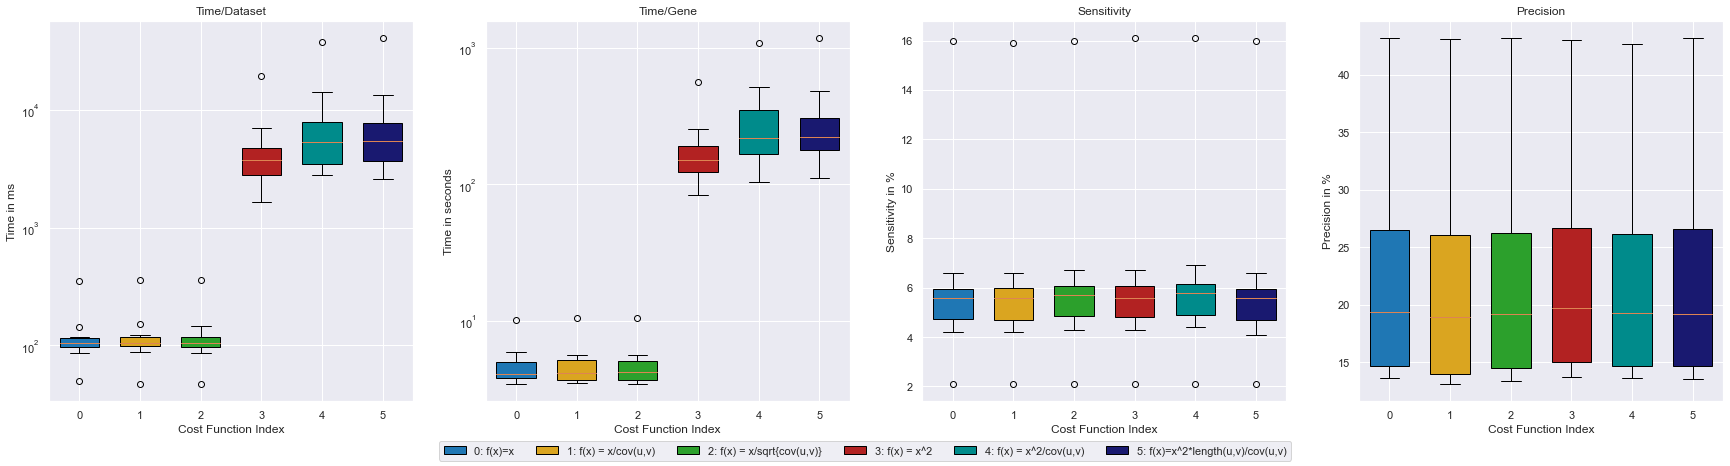

In [185]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']
cost_functions = ('0: f(x)=x', '1: f(x) = x/cov(u,v)', '2: f(x) = x/sqrt{cov(u,v)}', '3: f(x) = x^2', '4: f(x) = x^2/cov(u,v)', '5: f(x)=x^2*length(u,v)/cov(u,v)')
# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_DPLP_0['Time'], WP3_df_DPLP_1['Time'], WP3_df_DPLP_2['Time'], WP3_df_DPLP_3['Time'], WP3_df_DPLP_4['Time'], WP3_df_DPLP_5['Time']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('Time/Dataset')
ax1.set_xlabel('Cost Function Index')
ax1.set_ylabel('Time in ms')
ax1.set_yscale('log')
boxes = []
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)
    boxes.append(patch)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_DPLP_0['Time/Gene'], WP3_df_DPLP_1['Time/Gene'], WP3_df_DPLP_2['Time/Gene'], WP3_df_DPLP_3['Time/Gene'], WP3_df_DPLP_4['Time/Gene'], WP3_df_DPLP_5['Time/Gene']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in seconds')
ax2.set_xlabel('Cost Function Index')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_DPLP_0['Sensitivity on IntronChainLevel'], WP3_df_DPLP_1['Sensitivity on IntronChainLevel'], WP3_df_DPLP_2['Sensitivity on IntronChainLevel'], WP3_df_DPLP_3['Sensitivity on IntronChainLevel'], WP3_df_DPLP_4['Sensitivity on IntronChainLevel'], WP3_df_DPLP_5['Sensitivity on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_DPLP_0['Precision on IntronChainLevel'],WP3_df_DPLP_1['Precision on IntronChainLevel'], WP3_df_DPLP_2['Precision on IntronChainLevel'], WP3_df_DPLP_3['Precision on IntronChainLevel'], WP3_df_DPLP_4['Precision on IntronChainLevel'], WP3_df_DPLP_5['Precision on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/DPLP_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()

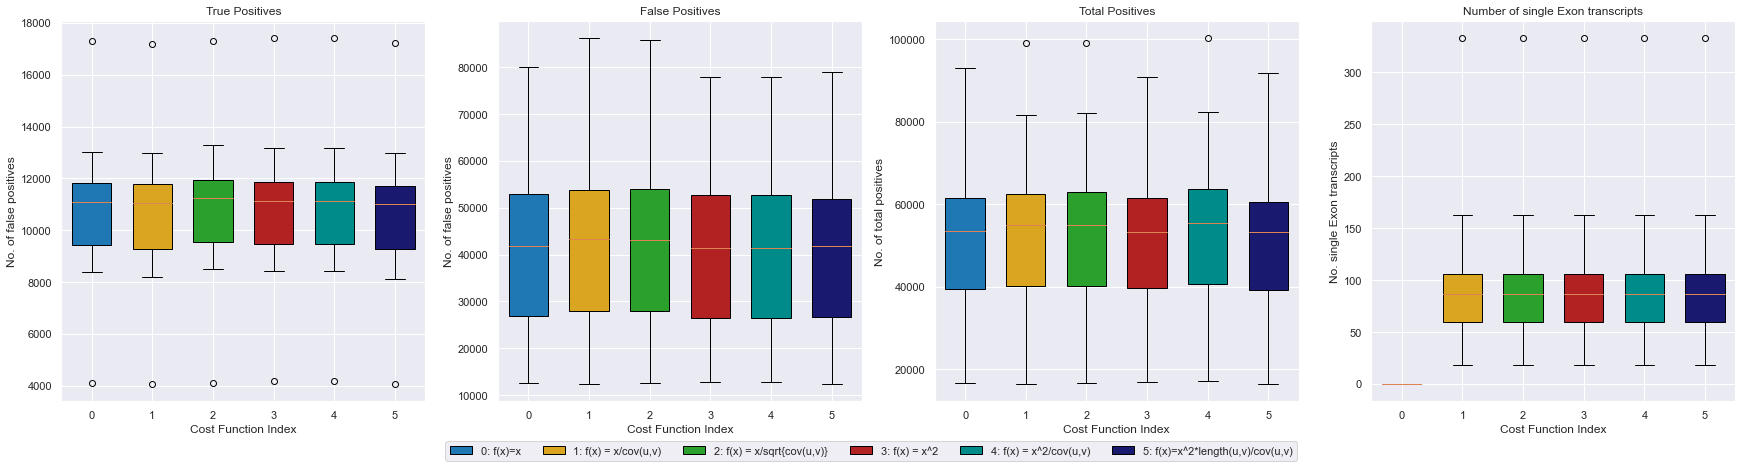

In [186]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']

# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_DPLP_0['True positives'], WP3_df_DPLP_1['True positives'], WP3_df_DPLP_2['True positives'], WP3_df_DPLP_3['True positives'], WP3_df_DPLP_3['True positives'], WP3_df_DPLP_5['True positives']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('True Positives')
ax1.set_ylabel('No. of false positives')
ax1.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_DPLP_0['False positives'], WP3_df_DPLP_1['False positives'], WP3_df_DPLP_2['False positives'], WP3_df_DPLP_3['False positives'], WP3_df_DPLP_3['False positives'], WP3_df_DPLP_5['False positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('False Positives')
ax2.set_ylabel('No. of false positives')
ax2.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_DPLP_0['Total positives'], WP3_df_DPLP_1['Total positives'], WP3_df_DPLP_2['Total positives'], WP3_df_DPLP_3['Total positives'], WP3_df_DPLP_4['Total positives'], WP3_df_DPLP_5['Total positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Total Positives')
ax3.set_ylabel('No. of total positives')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_DPLP_0['Number of single Exon transcripts without Optimization'], WP3_df_DPLP_1['Number of single Exon transcripts with Optimization'], WP3_df_DPLP_2['Number of single Exon transcripts with Optimization'], WP3_df_DPLP_3['Number of single Exon transcripts with Optimization'], WP3_df_DPLP_4['Number of single Exon transcripts with Optimization'], WP3_df_DPLP_5['Number of single Exon transcripts with Optimization']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Number of single Exon transcripts')
ax4.set_ylabel('No. single Exon transcripts')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/DPLP_CostFunctions_Positives_SingleExons.png')
plt.show()

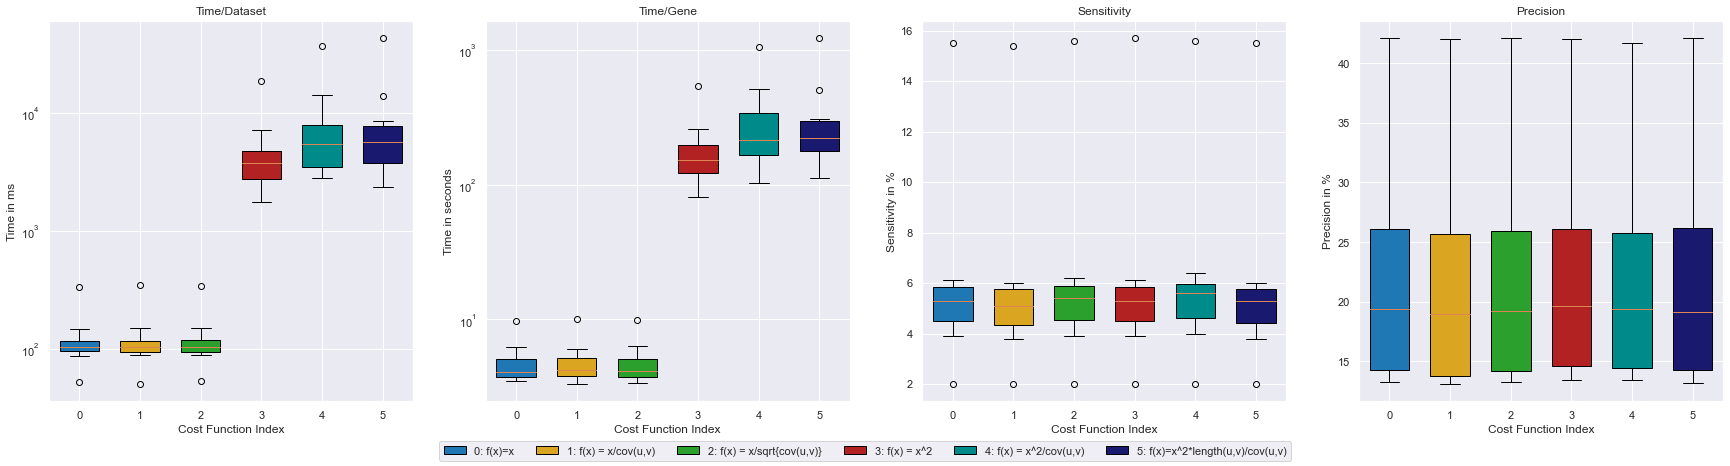

In [187]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']
cost_functions = ('0: f(x)=x', '1: f(x) = x/cov(u,v)', '2: f(x) = x/sqrt{cov(u,v)}', '3: f(x) = x^2', '4: f(x) = x^2/cov(u,v)', '5: f(x)=x^2*length(u,v)/cov(u,v)')
# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_DPMF_0['Time'], WP3_df_DPMF_1['Time'], WP3_df_DPMF_2['Time'], WP3_df_DPMF_3['Time'], WP3_df_DPMF_4['Time'], WP3_df_DPMF_5['Time']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('Time/Dataset')
ax1.set_xlabel('Cost Function Index')
ax1.set_ylabel('Time in ms')
ax1.set_yscale('log')
boxes = []
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)
    boxes.append(patch)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_DPMF_0['Time/Gene'], WP3_df_DPMF_1['Time/Gene'], WP3_df_DPMF_2['Time/Gene'], WP3_df_DPMF_3['Time/Gene'], WP3_df_DPMF_4['Time/Gene'], WP3_df_DPMF_5['Time/Gene']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in seconds')
ax2.set_xlabel('Cost Function Index')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_DPMF_0['Sensitivity on IntronChainLevel'], WP3_df_DPMF_1['Sensitivity on IntronChainLevel'], WP3_df_DPMF_2['Sensitivity on IntronChainLevel'], WP3_df_DPMF_3['Sensitivity on IntronChainLevel'], WP3_df_DPMF_4['Sensitivity on IntronChainLevel'], WP3_df_DPMF_5['Sensitivity on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_DPMF_0['Precision on IntronChainLevel'],WP3_df_DPMF_1['Precision on IntronChainLevel'], WP3_df_DPMF_2['Precision on IntronChainLevel'], WP3_df_DPMF_3['Precision on IntronChainLevel'], WP3_df_DPMF_4['Precision on IntronChainLevel'], WP3_df_DPMF_5['Precision on IntronChainLevel']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/DPMF_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()

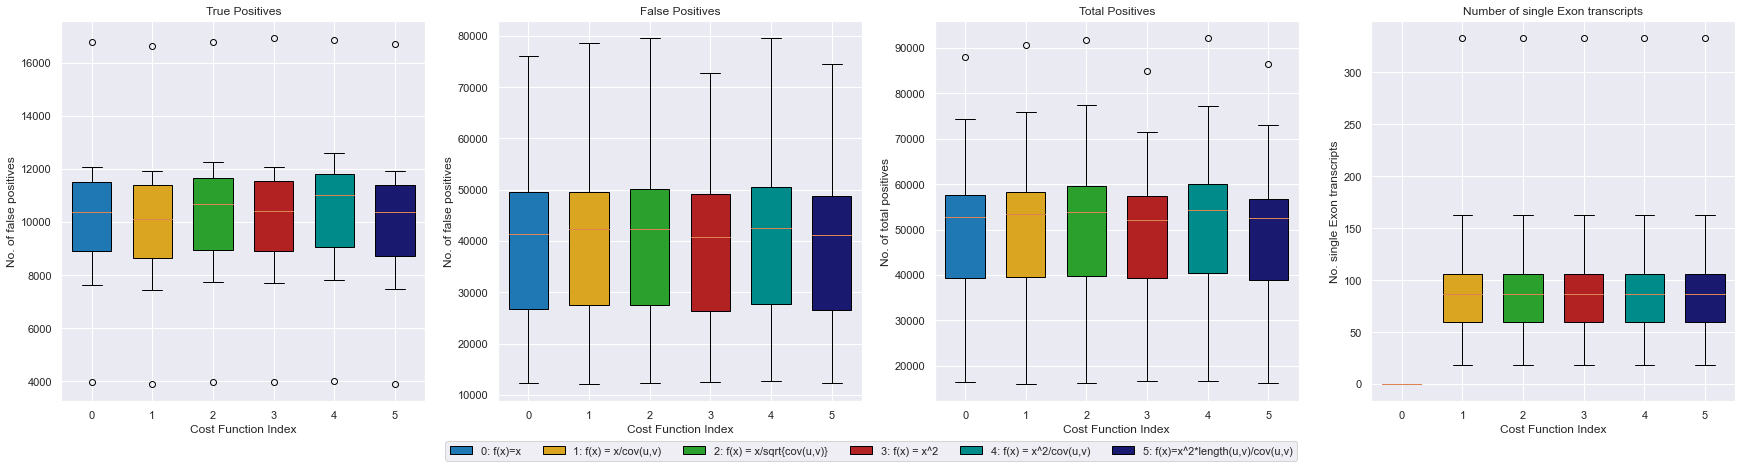

In [188]:
# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan', 'midnightblue']

# Plot Time
boxplot1=ax1.boxplot(x=[WP3_df_DPMF_0['True positives'], WP3_df_DPMF_1['True positives'], WP3_df_DPMF_2['True positives'], WP3_df_DPMF_3['True positives'], WP3_df_DPMF_4['True positives'], WP3_df_DPMF_5['True positives']], widths=0.65, patch_artist=True, labels=['0', '1', '2', '3', '4', '5'])
ax1.set_title('True Positives')
ax1.set_ylabel('No. of false positives')
ax1.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP3_df_DPMF_0['False positives'], WP3_df_DPMF_1['False positives'], WP3_df_DPMF_2['False positives'], WP3_df_DPMF_3['False positives'], WP3_df_DPMF_4['False positives'], WP3_df_DPMF_5['False positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax2.set_title('False Positives')
ax2.set_ylabel('No. of false positives')
ax2.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP3_df_DPMF_0['Total positives'], WP3_df_DPMF_1['Total positives'], WP3_df_DPMF_2['Total positives'], WP3_df_DPMF_3['Total positives'], WP3_df_DPMF_4['Total positives'], WP3_df_DPMF_5['Total positives']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax3.set_title('Total Positives')
ax3.set_ylabel('No. of total positives')
ax3.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP3_df_DPMF_0['Number of single Exon transcripts without Optimization'], WP3_df_DPMF_1['Number of single Exon transcripts with Optimization'], WP3_df_DPMF_2['Number of single Exon transcripts with Optimization'], WP3_df_DPMF_3['Number of single Exon transcripts with Optimization'], WP3_df_DPMF_4['Number of single Exon transcripts with Optimization'], WP3_df_DPMF_5['Number of single Exon transcripts with Optimization']], widths=0.65, labels=['0', '1', '2', '3', '4', '5'], patch_artist=True)
ax4.set_title('Number of single Exon transcripts')
ax4.set_ylabel('No. single Exon transcripts')
ax4.set_xlabel('Cost Function Index')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)
    
plt.figlegend(handles = boxes, labels=cost_functions, loc = 'lower center', ncol=6, labelspacing=0.)
plt.savefig('../Results/WP3/DPMF_CostFunctions_Positives_SingleExons.png')
plt.show()

In [189]:

# Read JsonFiles
jsonPwd = ('../Results/WP3/')
jsonPwdFull = ('../../../ResultsBackUp/WP1')

globalJsonFileDict = {}
graphList = ['human_geuvadis_simulated_5sets', 'human_leukemia_real_5sets', 'SRR307903', 'SRR307911', 'SRR315323', 'SRR315334', 'SRR387661', 'SRR534291', 'SRR534307'] # , 'SRR534319', 'SRR545695', 'SRR545723', 'ERR188021']
modeList = ['TLLP', 'TLMF', 'DPLP', 'DPMF', 'full']
costFunction = ['CostFunction0', 'CostFunction1', 'CostFunction2', 'CostFunction3', 'CostFunction4', 'CostFunction5']
for graphName in graphList:
    globalJsonGraphDict = {}
    for mode in modeList:
        globalJsonModeDict = {}
        if mode != 'full':
            for i in range(0,6): 
                if i<=2:
                    jsonFilename = jsonPwd + '/' + graphName + '/' + mode +'/CostFunction' + str(i) + '/' + graphName + mode + 'CostFunction' + str(i) +'.json'
                else:
                    jsonFilename = jsonPwd + '/' + graphName + '/' + mode +'/CostFunction' + str(i) + '/100/' + graphName + mode + 'CostFunction' + str(i) +'100.json'
                jsonFile = open(jsonFilename, 'r')
                localJsonFileDict = json.load(jsonFile)
                globalJsonModeDict['CostFunction'+str(i)] = localJsonFileDict
                jsonFile.close()
            globalJsonGraphDict[mode] = globalJsonModeDict
        else:
            jsonFilename = jsonPwdFull + '/' + graphName + '/' + mode + '/' + graphName + mode +'.json'
            jsonFile = open(jsonFilename, 'r')
            localJsonFileDict = json.load(jsonFile)
            globalJsonGraphDict[mode] = localJsonFileDict
    globalJsonFileDict[graphName] = globalJsonGraphDict

In [171]:
# Plot Results

# Create figure with 6 Figures

transcriptSizeListFull = []
transcriptSizeListTLLP = []
transcriptSizeListTLMF = []
transcriptSizeListDPLP = []
transcriptSizeListDPMF = []

transcriptNumberListFull = []
transcriptNumberListTLLP = []
transcriptNumberListTLMF = []
transcriptNumberListDPLP = []
transcriptNumberListDPMF = []

zeroTranscriptCounterFull = 0
zeroTranscriptCounterTLLP = 0
zeroTranscriptCounterTLMF = 0
zeroTranscriptCounterDPLP = 0
zeroTranscriptCounterDPMF = 0 

z = 1
for graphName in graphList:
    for mode in modeList:
        if mode=='full':
            for i in range(len(globalJsonFileDict[graphName][mode])):
                if str(i) in globalJsonFileDict[graphName][mode].keys():
                    if len(globalJsonFileDict[graphName][mode][str(i)])!=0:
                        transcriptNumberListFull.append(len(globalJsonFileDict[graphName][mode][str(i)]))    
                        for j in range(len(globalJsonFileDict[graphName][mode][str(i)])):
                            transcriptSizeListFull.append(len(globalJsonFileDict[graphName][mode][str(i)][j]))
                    else:
                        zeroTranscriptCounterFull +=1
        else:
            for costIndex in costFunction:
                for i in range(len(globalJsonFileDict[graphName][mode][costIndex])):
                    if str(i) in globalJsonFileDict[graphName][mode][costIndex].keys():
                        if mode=='TLLP':
                            if len(globalJsonFileDict[graphName][mode][costIndex][str(i)])!=0:
                                transcriptNumberListTLLP.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)]))
                                for j in range(len(globalJsonFileDict[graphName][mode][costIndex][str(i)])):
                                    transcriptSizeListTLLP.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)][j][0]))
                            else: 
                                zeroTranscriptCounterTLLP += 1
                        elif mode=='TLMF':
                            if len(globalJsonFileDict[graphName][mode][costIndex][str(i)])!=0:
                                transcriptNumberListTLMF.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)]))
                                for j in range(len(globalJsonFileDict[graphName][mode][costIndex][str(i)])):
                                    transcriptSizeListTLMF.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)][j][0]))
                            else: 
                                zeroTranscriptCounterTLMF += 1
                        elif mode=='DPLP':
                            if len(globalJsonFileDict[graphName][mode][costIndex][str(i)])!=0:
                                transcriptNumberListDPLP.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)]))
                                for j in range(len(globalJsonFileDict[graphName][mode][costIndex][str(i)])):
                                    transcriptSizeListDPLP.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)][j][0]))
                            else: 
                                zeroTranscriptCounterDPLP += 1
                        elif mode == 'DPMF':
                            if len(globalJsonFileDict[graphName][mode][costIndex][str(i)])!=0:
                                transcriptNumberListDPMF.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)]))
                                for j in range(len(globalJsonFileDict[graphName][mode][costIndex][str(i)])):
                                    transcriptSizeListDPMF.append(len(globalJsonFileDict[graphName][mode][costIndex][str(i)][j][0]))
                            else: 
                                zeroTranscriptCounterDPLP += 1
                    else:
                        continue


/var/folders/1c/m3fts4qs7_n2scc_qgzqy7sw0000gn/T/ipykernel_90917/1073586845.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', 'Full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'])
/var/folders/1c/m3fts4qs7_n2scc_qgzqy7sw0000gn/T/ipykernel_90917/1073586845.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', 'Full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'])


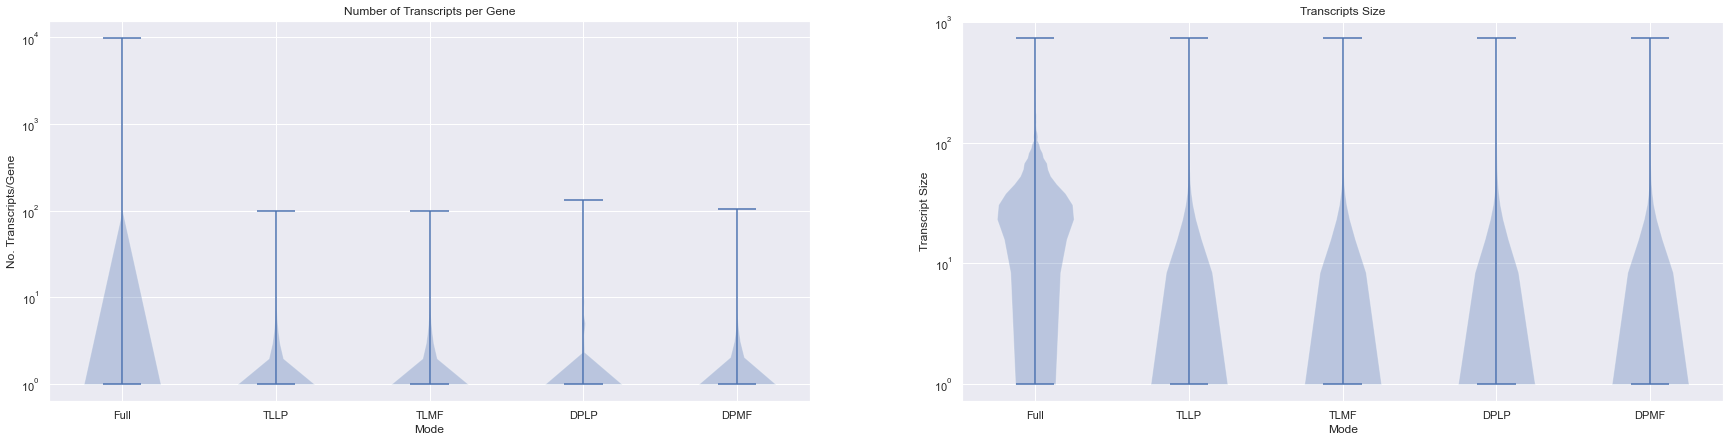

In [172]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (30, 7))
sns.set(style="darkgrid")

# Plot True Positives 
ax1.violinplot(dataset=[transcriptNumberListFull, transcriptNumberListTLLP, transcriptNumberListTLLP, transcriptNumberListDPLP, transcriptNumberListDPMF])
ax1.set_title('Number of Transcripts per Gene')
ax1.set_xlabel('Mode')
ax1.set_ylabel('No. Transcripts/Gene')
ax1.set_xticklabels(['', 'Full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'])

ax1.set_yscale("log")

# Plot False Positives
ax2.violinplot(dataset=[transcriptSizeListFull, transcriptSizeListTLLP, transcriptSizeListTLLP, transcriptSizeListDPLP, transcriptSizeListDPMF])
ax2.set_title('Transcripts Size')
ax2.set_xlabel('Mode')
ax2.set_ylabel('Transcript Size')
ax2.set_yscale("log")
ax2.set_xticklabels(['', 'Full', 'TLLP', 'TLMF', 'DPLP', 'DPMF'])
plt.savefig('../Results/WP3/Mode_NoTranscriptsTranscriptSize.png')
plt.show()


In [191]:
#Drop from full

WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR315323.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR315334.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR387661.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR534291.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR534307.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR534319.graph'].index)
WP1_df_full = WP1_df_full.drop(WP1_df_full[WP1_df_full.Data == 'SRR545695.graph'].index)

WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR315323.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR315334.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR387661.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR534291.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR534307.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR534319.graph'].index)
WP1_df_paired2 = WP1_df_paired2.drop(WP1_df_paired2[WP1_df_paired2.Data == 'SRR545695.graph'].index)

WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR315323.graph'].index)
WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR315334.graph'].index)
WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR387661.graph'].index)
WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR534291.graph'].index)
WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR534307.graph'].index)
WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR534319.graph'].index)
WP3_df_DPLP_2 = WP3_df_DPLP_2.drop(WP3_df_DPLP_2[WP3_df_DPLP_2.Data == 'SRR545695.graph'].index)

WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR315323.graph'].index)
WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR315334.graph'].index)
WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR387661.graph'].index)
WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR534291.graph'].index)
WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR534307.graph'].index)
WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR534319.graph'].index)
WP3_df_TLLP_2 = WP3_df_TLLP_2.drop(WP3_df_TLLP_2[WP3_df_TLLP_2.Data == 'SRR545695.graph'].index)

WP3_df_TLLP_2['Precision on IntronChainLevel']

2     43.2
26    25.0
50    31.3
74    21.6
Name: Precision on IntronChainLevel, dtype: float64

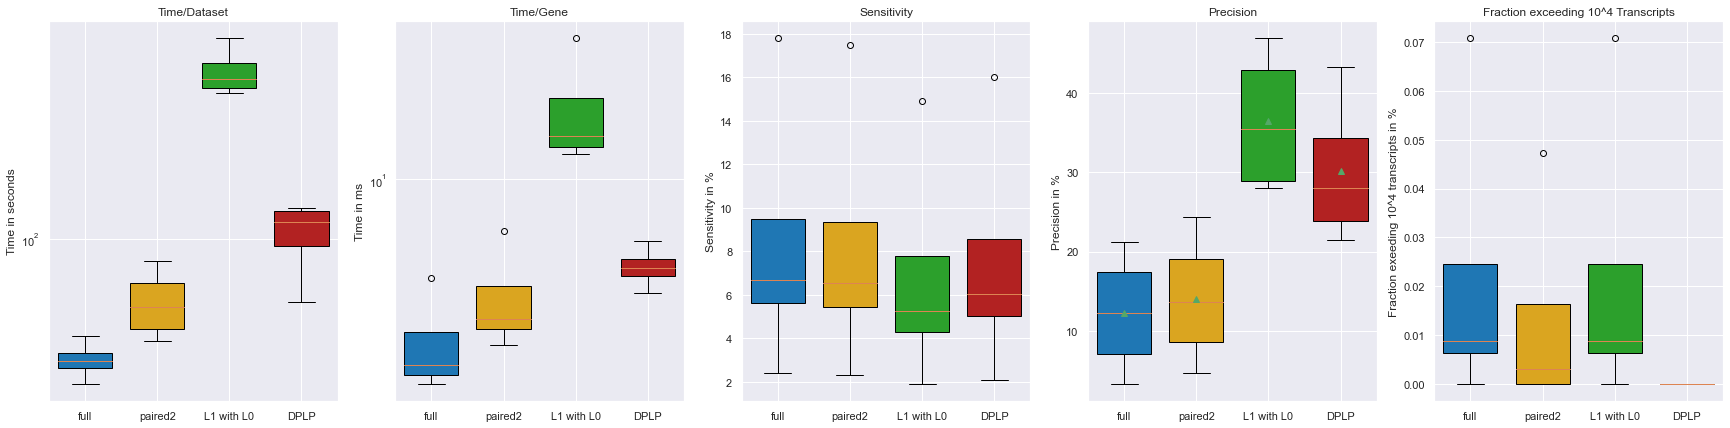

In [193]:


# Create figure with 5 Figures
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize = (30, 7))

colors = ['tab:blue', 'goldenrod', 'tab:green', 'firebrick', 'darkcyan']

# Plot Time
boxplot1=ax1.boxplot(x=[WP1_df_full['Time'], WP1_df_paired2['Time'], WP2_df_L1_LO_10['Time'], WP3_df_TLLP_2['Time']], widths=0.75, patch_artist=True, labels=['full', 'paired2', 'L1 with L0', 'DPLP'])
ax1.set_title('Time/Dataset')
ax1.set_ylabel('Time in seconds')
ax1.set_yscale('log')
 
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Plot Time/Gene
boxplot2=ax2.boxplot(x=[WP1_df_full['Time/Gene'], WP1_df_paired2['Time/Gene'], WP2_df_L1_LO_10['Time/Gene'], WP3_df_DPLP_2['Time/Gene']], widths=0.75, patch_artist=True, labels=['full', 'paired2', 'L1 with L0', 'DPLP'])
ax2.set_title('Time/Gene')
ax2.set_ylabel('Time in ms')
ax2.set_yscale('log')
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)

# Plot Sensitivities
boxplot3=ax3.boxplot(x=[WP1_df_full['Sensitivity on IntronChainLevel'], WP1_df_paired2['Sensitivity on IntronChainLevel'], WP2_df_L1_LO_10['Sensitivity on IntronChainLevel'], WP3_df_DPLP_2['Sensitivity on IntronChainLevel']], widths=0.75, labels=['full', 'paired2', 'L1 with L0', 'DPLP'], patch_artist=True)
ax3.set_title('Sensitivity')
ax3.set_ylabel('Sensitivity in %')
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)

# Plot Precision
boxplot4=ax4.boxplot(x=[WP1_df_full['Precision on IntronChainLevel'],WP1_df_paired2['Precision on IntronChainLevel'], WP2_df_L1_LO_10['Precision on IntronChainLevel'], WP3_df_DPLP_2['Precision on IntronChainLevel']], widths=0.75, labels=['full', 'paired2', 'L1 with L0', 'DPLP'], patch_artist=True,showmeans=True)
ax4.set_title('Precision')
ax4.set_ylabel('Precision in %')
for patch, color in zip(boxplot4['boxes'], colors):
    patch.set_facecolor(color)

# Plot Fraction exceeding Max Transcripts
boxplot5=ax5.boxplot(x=[WP1_df_full['Fraction exceeding Transcripts'], WP1_df_paired2['Fraction exceeding Transcripts'], WP2_df_L1_LO_10['Fraction exceeding Transcripts'], WP3_df_DPLP_2['Fraction exceeding Transcripts']], widths=0.75, labels=['full', 'paired2', 'L1 with L0', 'DPLP'], patch_artist=True)
ax5.set_title('Fraction exceeding 10^4 Transcripts')
ax5.set_ylabel('Fraction exeeding 10^4 transcripts in %')
for patch, color in zip(boxplot5['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('../Results/General_Time_Sensitivity_Precision_FractionExceeding.png')
plt.show()

In [190]:
WP3_df_DPLP_2

,Data,Graph,full,multi,paired1,paired2,Number of maximum recursion depth,Number of maximum Transcripts/Gene,opt,Norm,...,False positives,Total positives,False negatives,Total Transcripts of ReferenceGTF,Sensitivity on IntronChainLevel,Precision on IntronChainLevel,Fuzzy Sensitivity on IntronChainLevel,Fuzzy Precision on IntronChainLevel,Time/Gene,Fraction exceeding Transcripts
14,human_geuvadis_simulated_5sets.graph,cleaned,0,0,0,0,276,10000,0,-1,...,22812,40126,99654,116968,16.0,43.2,99.2,100.0,4.504531,0.0
38,human_leukemia_real_5sets.graph,cleaned,0,0,0,0,307,10000,0,-1,...,12538,16659,222690,226811,2.1,24.7,30.6,100.0,5.599481,0.0
62,SRR307903.graph,cleaned,0,0,0,0,989,10000,0,-1,...,26561,38638,214734,226811,6.1,31.3,50.6,100.0,4.246477,0.0
86,SRR307911.graph,cleaned,0,0,0,0,668,10000,0,-1,...,43146,54980,214977,226811,6.0,21.5,61.4,100.0,3.483287,0.0
110,SRR315323.graph,cleaned,0,0,0,0,1857,10000,0,-1,...,41335,51146,217000,226811,5.0,19.2,72.6,100.0,4.046224,0.0
134,SRR315334.graph,cleaned,0,0,0,0,401,10000,0,-1,...,29188,40425,215574,226811,5.7,27.8,52.0,100.0,3.546943,0.0
158,SRR387661.graph,cleaned,0,0,0,0,571,10000,0,-1,...,70527,82170,215168,226811,5.9,14.2,100.0,100.0,5.351151,0.0
182,SRR534291.graph,cleaned,0,0,0,0,1123,10000,0,-1,...,51410,62479,215742,226811,5.6,17.7,88.8,100.0,3.456610,0.0
206,SRR534307.graph,cleaned,0,0,0,0,1668,10000,0,-1,...,85830,99139,213502,226811,6.7,13.4,100.0,100.0,10.473602,0.0
230,SRR534319.graph,cleaned,0,0,0,0,1091,10000,0,-1,...,54062,62556,218317,226811,4.3,13.6,96.6,100.0,3.898793,0.0
